In [245]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np
%matplotlib inline

This is the dataset for the admissions task to apply to the data science immersive at General Assembly. The data is from Kickstarter, which is a company that helps creators fund their artistic projects. I will need to use this data to answer questions and prepare a presentation.

In [246]:
ks=pd.read_csv('~/Downloads/DSI_kickstarterscrape_dataset.csv',encoding='ISO-8859-1')
ks.head()

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00


In [247]:
ks.shape

(45957, 17)

In [248]:
ks.columns

Index(['project id', 'name', 'url', 'category', 'subcategory', 'location',
       'status', 'goal', 'pledged', 'funded percentage', 'backers',
       'funded date', 'levels', 'reward levels', 'updates', 'comments',
       'duration'],
      dtype='object')

The first question is to find the average pledge total. I used .describe to help.

The mean pledged amount is 4980.75

In [249]:
ks[['pledged']].describe()

,pledged
count,4.594500e+04
mean,4.980750e+03
std,5.674162e+04
min,0.000000e+00
25%,1.960000e+02
50%,1.310000e+03
75%,4.165000e+03
max,1.026684e+07


The next question asks about the distribution of the backers column.

In [250]:
ks[['backers']].describe()

,backers
count,45957.000000
mean,69.973192
std,688.628479
min,0.000000
25%,5.000000
50%,23.000000
75%,59.000000
max,87142.000000


The backers column is right skewed.

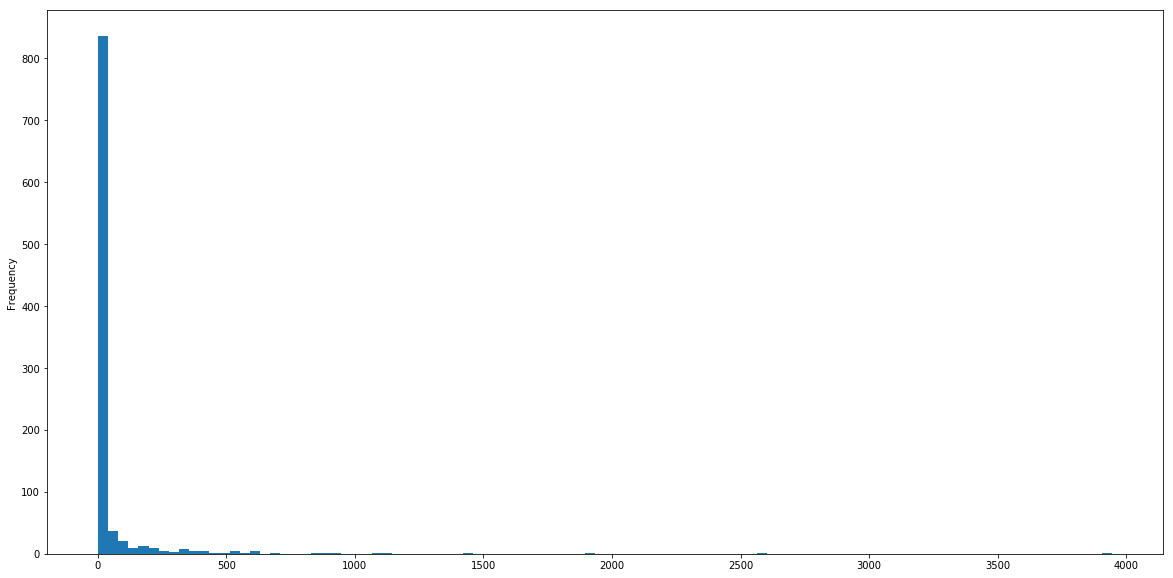

In [251]:
ks['backers'].value_counts().plot(kind='hist', bins=100,figsize=(20,10))

The next question is about the duration column. The histogram is not normally distributed.

Duration is not normally distributed.

In [252]:
ks[['duration']].describe()

,duration
count,45957.000000
mean,39.995547
std,17.414458
min,1.000000
25%,30.000000
50%,32.000000
75%,48.390000
max,91.960000


Text(0.5,0,'number of days')

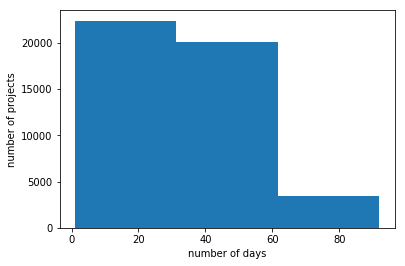

In [253]:
ax=ks['duration'].plot(kind='hist', bins= 3)
ax.set_ylabel('number of projects')
ax.set_xlabel('number of days')

Text(0.5,0,'number of days')

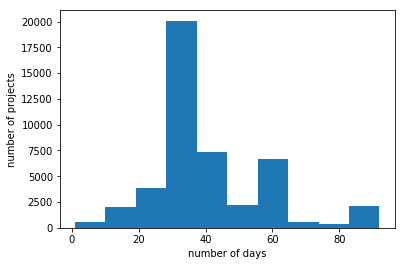

In [254]:
ax=ks['duration'].plot(kind='hist', bins= 10)
ax.set_ylabel('number of projects')
ax.set_xlabel('number of days')

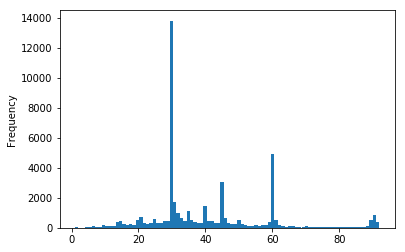

In [255]:
ks['duration'].plot(kind='hist', bins= 90)

I examine the various categories to see which are more popular. Film and Video and Music seem to dominate. 

Text(0,0.5,'number of projects')

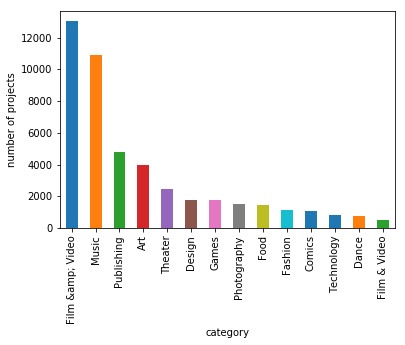

In [256]:
ax=ks['category'].value_counts().plot(kind='bar')
ax.set_xlabel('category')
ax.set_ylabel('number of projects')

There are also subcategories, I look at these to refine my view.Short film, documentary,film and video, music and theater make up the top five.

Text(0,0.5,'number of projects')

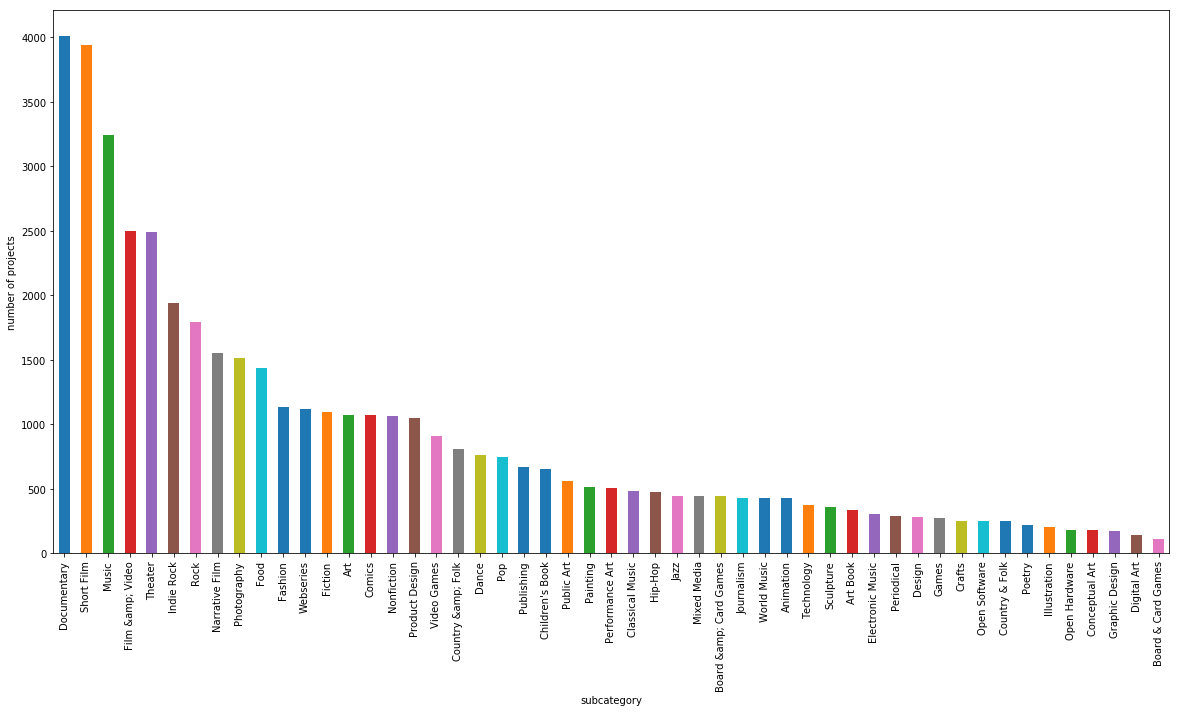

In [258]:
ax=ks['subcategory'].value_counts().plot(kind='bar',figsize=(20,10))
ax.set_xlabel('subcategory')
ax.set_ylabel('number of projects')

The presentation will focus on the successful kickstarter projects. In the status column , I see successful is one of five possibilities.

In [259]:
ks['status'].unique ()


array(['successful', 'failed', 'live', 'canceled', 'suspended'],
      dtype=object)

In [260]:
ks['status'].value_counts()

successful    22969
failed        18996
live           3929
canceled         59
suspended         4
Name: status, dtype: int64

I wanted to compare successful with failed projects via the category column.

Text(0,0.5,'Number of Successful Projects')

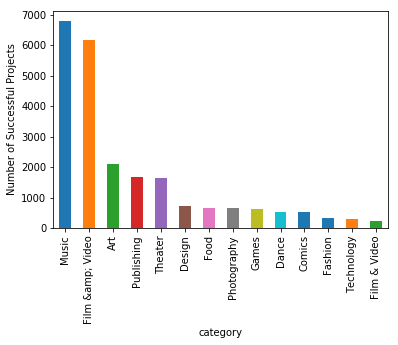

In [261]:
ax=ks.loc[ks.status == ('successful'),'category'].value_counts().plot(kind='bar')
ax.set_xlabel('category')
ax.set_ylabel('Number of Successful Projects')

Text(0,0.5,'Number of Unsuccessful Projects')

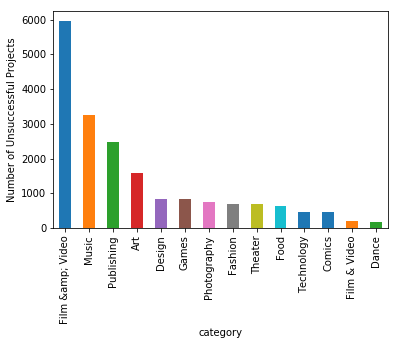

In [262]:
ax=ks.loc[ks.status == ('failed'),'category'].value_counts().plot(kind='bar')
ax.set_xlabel('category')
ax.set_ylabel('Number of Unsuccessful Projects')

I wanted to compare successful with failed projects via the subcategory column as well.

Text(0,0.5,'Number of Successful Projects')

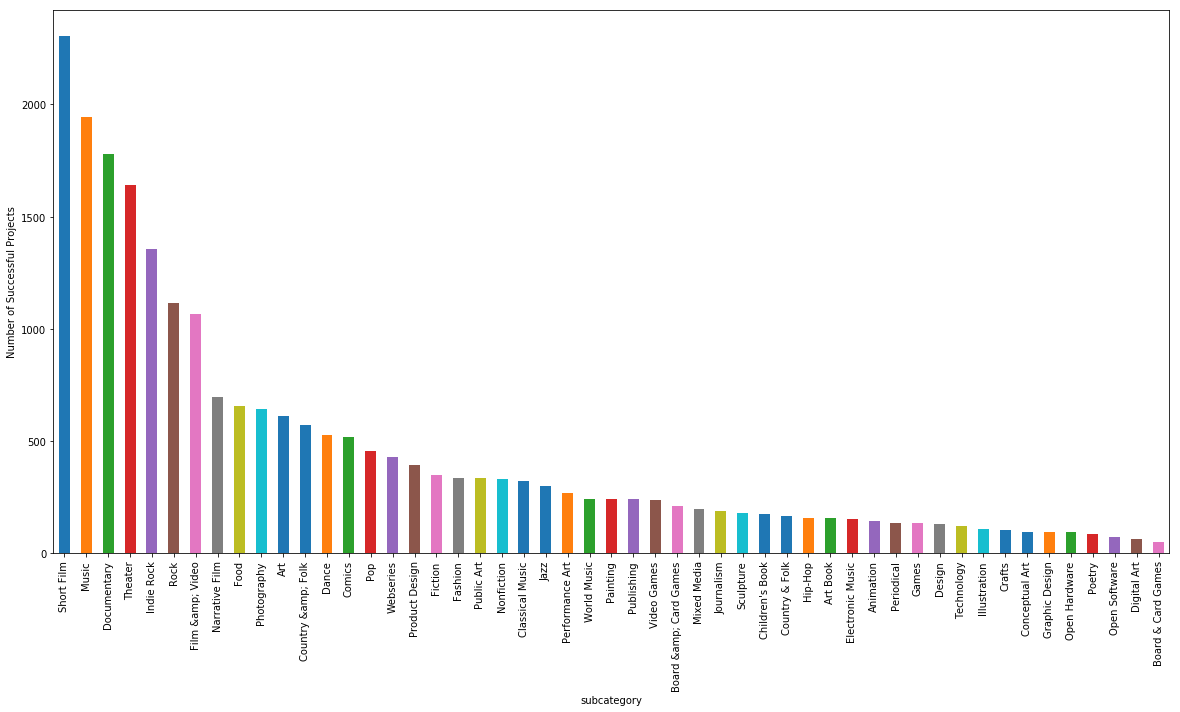

In [263]:
ax=ks.loc[ks.status == ('successful'),'subcategory'].value_counts().plot(kind='bar',figsize=(20,10))
ax.set_xlabel('subcategory')
ax.set_ylabel('Number of Successful Projects')

Text(0,0.5,'Number of Unsuccessful Projects')

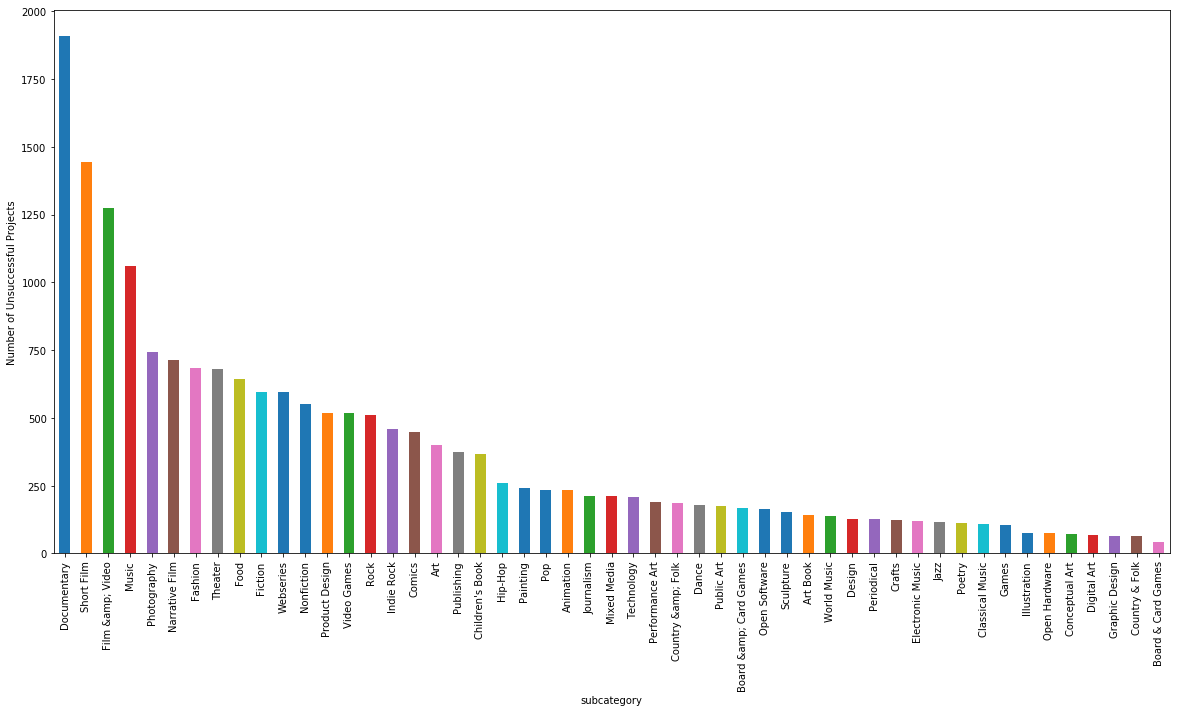

In [264]:
ax=ks.loc[ks.status == ('failed'),'subcategory'].value_counts().plot(kind='bar',figsize=(20,10))
ax.set_xlabel('subcategory')
ax.set_ylabel('Number of Unsuccessful Projects')

The average goal of all the kickerstarters is $11,942 and the median is $4,000.

In [265]:
ks['goal'].describe()

count    4.595700e+04
mean     1.194271e+04
std      1.887583e+05
min      1.000000e-02
25%      1.800000e+03
50%      4.000000e+03
75%      9.862000e+03
max      2.147484e+07
Name: goal, dtype: float64

To look at the successful kickstarters, I created a subset of the original, containing just the successful campaigns, 22969 in total out of 45957 original.

In [266]:
kss=ks[ks['status']==('successful')]
ksf=ks[ks['status']==('failed')]

Looking at the goals of these successful campaigns, the median goal is $3000 and the mean is $5483 as there are a few extreme outliers.There are 181 projects whose goals are over $50000. The overall range is from 1 cent to $900,000 dollars. From my reading of the kickstarter rules there is no penalty for aiming too low; however if a goal is not 100% pledged the project is deemed a failure and the funds are returned to the backers. Knowing that a project will be a success may help some backers decide to overfund a project because they know the project will be going forward. For these reasons, the optimal goal levels would be between $3000 and $5483, depending on the needs of the project.

These numbers contrast with the all kickstarter numbers, with much less ambitious targets.

In [267]:
kss['goal'].describe()


count     22969.000000
mean       5483.827983
std       12364.050311
min           0.010000
25%        1300.000000
50%        3000.000000
75%        6000.000000
max      900000.000000
Name: goal, dtype: float64

Looking at the failed projects, one can see the numbers are much higher  median is $5,000 and the average was $16,350

In [268]:
ksf['goal'].describe()

count    1.899600e+04
mean     1.635059e+04
std      2.191424e+05
min      5.000000e-01
25%      2.500000e+03
50%      5.000000e+03
75%      1.200000e+04
max      2.147484e+07
Name: goal, dtype: float64

I wanted to see how many outlier goals there were and I found 181 successful projects with goals over $50,000.

In [269]:
ksss=(kss['goal'])<50000
ksss.describe()

count     22969
unique        2
top        True
freq      22788
Name: goal, dtype: object

Text(0.5,0,'goal amount per project')

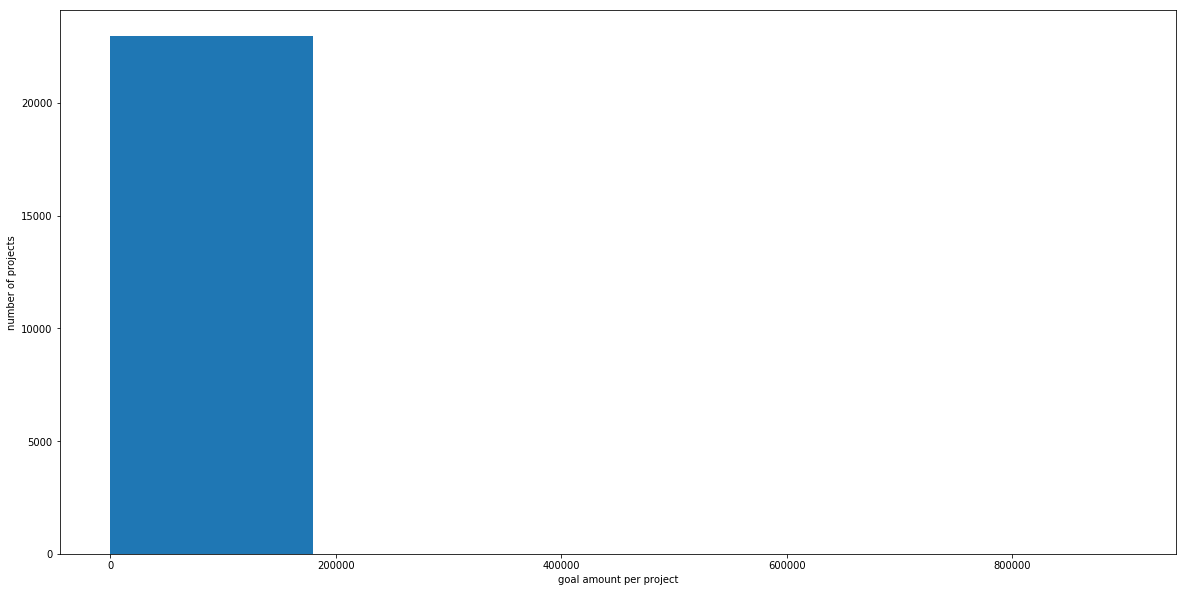

In [270]:
ax=kss['goal'].plot(kind='hist', bins= 5,figsize=(20,10))
ax.set_ylabel('number of projects')
ax.set_xlabel('goal amount per project')

Text(0.5,0,'goal amount per project')

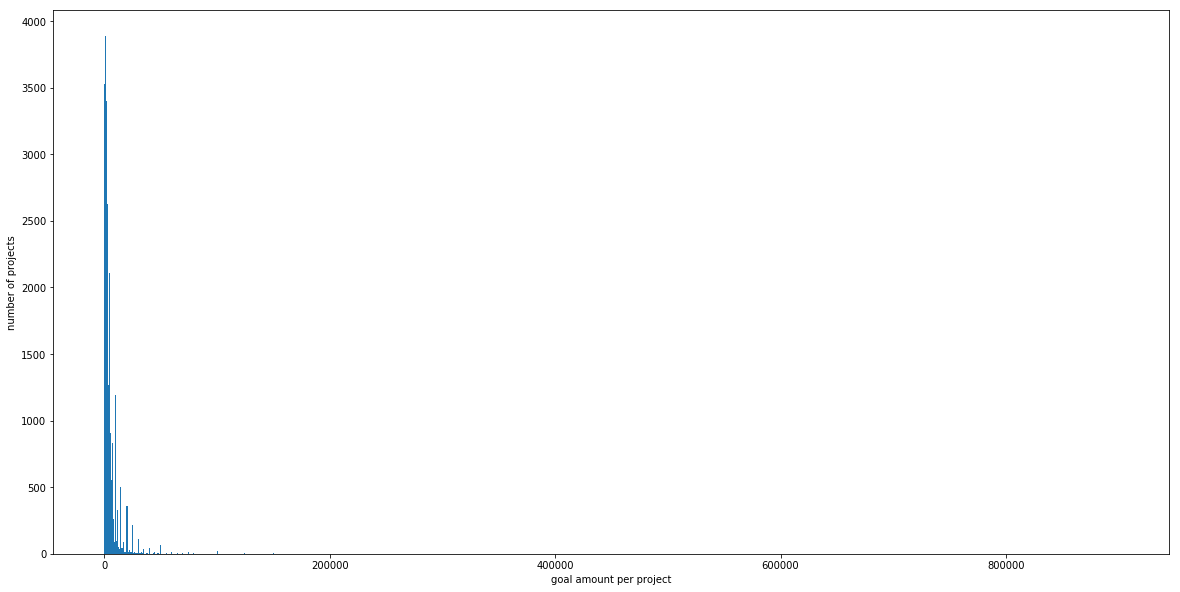

In [271]:
ax=kss['goal'].plot(kind='hist', bins= 1000,figsize=(20,10))
ax.set_ylabel('number of projects')
ax.set_xlabel('goal amount per project')

I looked at the duration column to find out more about how long successful kickstarter campaigns lasted. The median number of days per project is 31, while the mean is almost 38. The two histograms give more clarity about the distribution of the duration among the successful campaigns.The vast majority are under 60 days and  31 days straddles the line of creating a sense of urgency and allowing enough time to succeed.

In [272]:
kss['duration'].describe()

count    22969.000000
mean        37.960475
std         16.651234
min          1.000000
25%         30.000000
50%         31.000000
75%         45.000000
max         91.960000
Name: duration, dtype: float64

Text(0.5,0,'number of days')

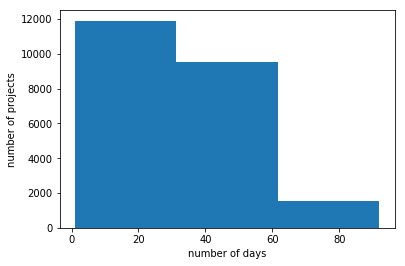

In [273]:
ax=kss['duration'].plot(kind='hist',bins=3)
ax.set_ylabel('number of projects')
ax.set_xlabel('number of days')

Text(0.5,0,'number of days')

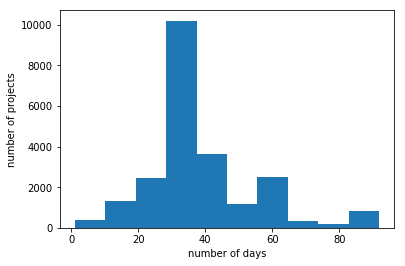

In [274]:
ax=kss['duration'].plot(kind='hist',bins=10)
ax.set_ylabel('number of projects')
ax.set_xlabel('number of days')

Text(0.5,0,'number of days')

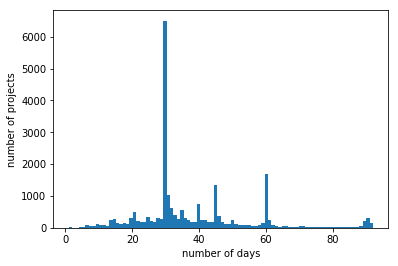

In [275]:
ax=kss['duration'].plot(kind='hist',bins=90)
ax.set_ylabel('number of projects')
ax.set_xlabel('number of days')

In [276]:
kss['category'].value_counts()

Music               6792
Film &amp; Video    6177
Art                 2106
Publishing          1671
Theater             1642
Design               729
Food                 655
Photography          645
Games                635
Dance                527
Comics               520
Fashion              335
Technology           289
Film & Video         246
Name: category, dtype: int64

The top successful categories are music, film &amp. video, art, publishing,and theater.

Text(0.5,0,'category')

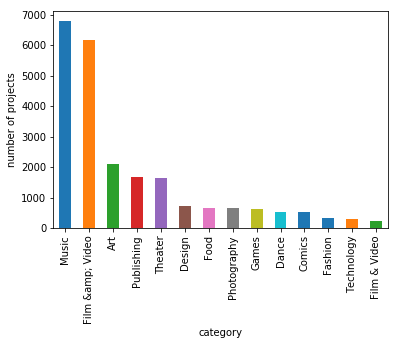

In [277]:
ax=kss['category'].value_counts().plot(kind='bar')
ax.set_ylabel('number of projects')
ax.set_xlabel('category')

Looking at the subcategories,performing arts such as : short film, music , documentary and theater are among the top successful projects.

In [278]:
kss['subcategory'].value_counts()

Short Film                2306
Music                     1945
Documentary               1781
Theater                   1642
Indie Rock                1358
Rock                      1117
Film &amp; Video          1065
Narrative Film             695
Food                       655
Photography                645
Art                        610
Country &amp; Folk         573
Dance                      527
Comics                     520
Pop                        457
Webseries                  431
Product Design             394
Fiction                    351
Fashion                    335
Public Art                 335
Nonfiction                 330
Classical Music            321
Jazz                       299
Performance Art            270
World Music                244
Painting                   242
Publishing                 241
Video Games                237
Board &amp; Card Games     212
Mixed Media                198
Journalism                 191
Sculpture                  178
Children

Text(0.5,0,'subcategory')

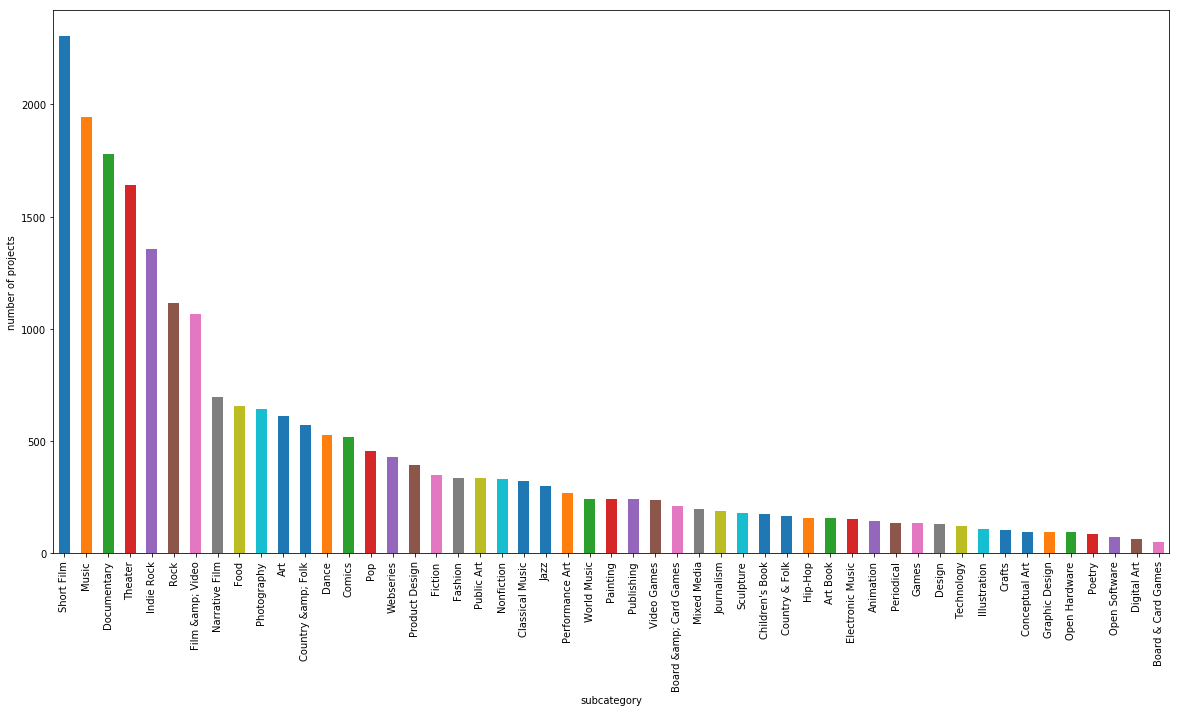

In [279]:
ax=kss['subcategory'].value_counts().plot(kind='bar',figsize=(20,10))
ax.set_ylabel('number of projects')
ax.set_xlabel('subcategory')

There could be some differences among the times of day, days of week, days of month and months of the year. Kickstarter is a New York based company and it uses Eastern Time. The most popular times to launch and end a project are early in the morning such as 3AM and 4AM. These times are nearly double the next closest. These early launches serve two purposes: first to access the European markets as they awake and second to maximize the first day to acheive good first day numbers as tracked by kickstarter. The most popular days of the week to end a campaign are Saturday, Monday and Friday. . The most popular time of the month to end a campaign is the first day of the month by far. The most popular months of the year to end projects are May, April and March.  

In [280]:
kss['funded date'].describe()

count                               22969
unique                              20504
top       Sun, 01 Jan 2012 04:59:00 -0000
freq                                   27
Name: funded date, dtype: object

In [281]:
kss['funded date'].unique()

array(['Fri, 19 Aug 2011 19:28:17 -0000',
       'Sun, 08 Apr 2012 02:14:00 -0000',
       'Wed, 22 Jun 2011 13:33:00 -0000', ...,
       'Thu, 30 Jun 2011 18:37:03 -0000',
       'Fri, 30 Mar 2012 13:57:00 -0000',
       'Thu, 04 Aug 2011 04:30:00 -0000'], dtype=object)

The data provides a column showing month,date, day and time. I used a function and .apply to create seperate columns for month, date , day and time in order to examine the data individually. This functions looks at the day of the week. Weekends along with Friday and Monday are more popular than midweek.

In [282]:
def get_day(day):
    return day[0:3]

In [283]:
kss['funded_day']= kss['funded date'].apply(get_day)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [284]:
kss['funded_day'].describe()

count     22969
unique        7
top         Sat
freq       3684
Name: funded_day, dtype: object

Text(0,0.5,'Number of Successful Projects')

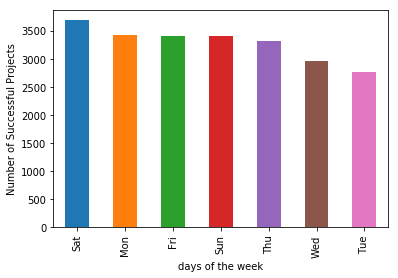

In [285]:
ax=kss['funded_day'].value_counts().plot(kind='bar')
ax.set_xlabel('days of the week')
ax.set_ylabel('Number of Successful Projects')

This function looks at month of the year. Spring months seem to be the most popular time of year.

In [286]:
def get_month(month):
    return month[8:11]

In [287]:
kss['funded_month']= kss['funded date'].apply(get_month)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [288]:
kss['funded_month'].describe()

count     22969
unique       12
top         May
freq       3044
Name: funded_month, dtype: object

Text(0,0.5,'Number of Successful Projects')

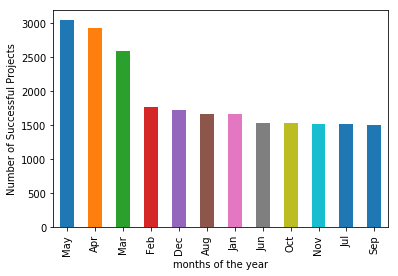

In [289]:
ax=kss['funded_month'].value_counts().plot(kind='bar')
ax.set_xlabel('months of the year')
ax.set_ylabel('Number of Successful Projects')

This function looks at day of the month, here we see the first of the month is the most popular.

In [290]:
def get_month_date(month_date):
    return month_date[5:7]

In [291]:
kss['funded_month_date']= kss['funded date'].apply(get_month_date)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [292]:
kss['funded_month_date'].describe()

count     22969
unique       31
top          01
freq       1691
Name: funded_month_date, dtype: object

Text(0,0.5,'Number of Successful Projects')

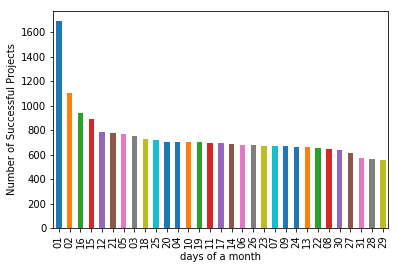

In [293]:
ax=kss['funded_month_date'].value_counts().plot(kind='bar')
ax.set_xlabel('days of a month')
ax.set_ylabel('Number of Successful Projects')

This function helps to get the time of day. 3AM and 4AM are the most popular times.

In [294]:
def get_time(time):
    return time[16:19]

In [295]:
kss['funded_time']= kss['funded date'].apply(get_time)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [296]:
kss['funded_time'].describe()

count     22969
unique       24
top          03
freq       2523
Name: funded_time, dtype: object

Text(0,0.5,'Number of Successful Projects')

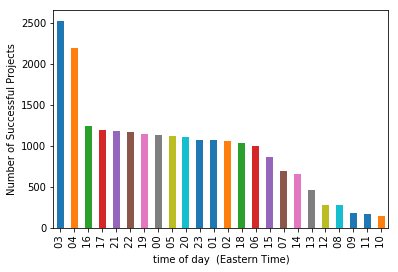

In [297]:
ax=kss['funded_time'].value_counts().plot(kind='bar')
ax.set_xlabel('time of day  (Eastern Time)')
ax.set_ylabel('Number of Successful Projects')

In [298]:
kss.columns


Index(['project id', 'name', 'url', 'category', 'subcategory', 'location',
       'status', 'goal', 'pledged', 'funded percentage', 'backers',
       'funded date', 'levels', 'reward levels', 'updates', 'comments',
       'duration', 'funded_day', 'funded_month', 'funded_month_date',
       'funded_time'],
      dtype='object')

I used the matrix to check for any other relationships to investigate.

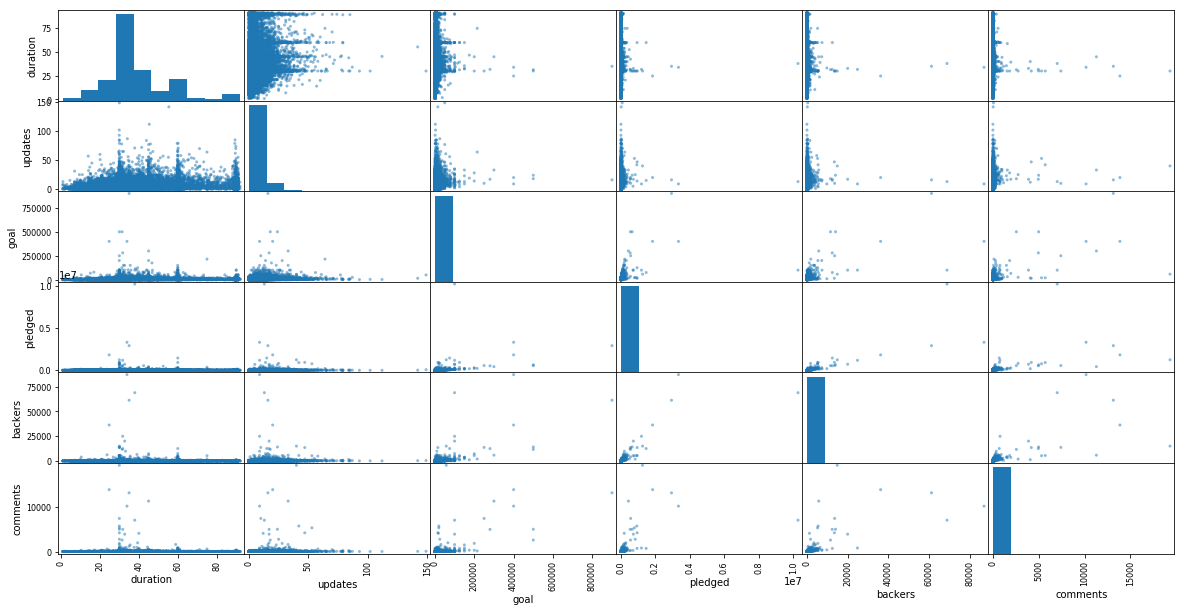

In [299]:
sm=pd.plotting.scatter_matrix(kss[['duration','updates','goal','pledged','backers','comments']],figsize=(20,10));

The most important column;however, is missing. As an investor, I would want to know the strength of the project creators' social network, how many instagram followers, how many youtube subscribers do they have. Kickstarter will provide a framework but the creators must have the network to succeed